In [1]:
import re

#导入人物字典{人物序号：[姓名列表]}
def get_charadict(infile):
    chara_dict = {}
    for each_line in open(infile).readlines():
        line_content = each_line.strip('\t').split()
        #print(line_content)

        chara_dict[int(line_content[0])] = []
        for i in range(1, len(line_content)):
            chara_dict[int(line_content[0])].append(line_content[i])
    return(chara_dict)

#转换人物字典为姓名字典{姓名：人物序号}
def name_to_index(chara_dict):
    name_dict = {}
    for index in chara_dict.keys():
        for name in chara_dict[index]:
            name_dict[name] = index
    return(name_dict)

#导入论语原文为字典{章节：原文}
def clean_content(infile):
    contents = {}
    for each_line in open(infile,'r').readlines():
        line_content = re.split(r'[()]', each_line)
        contents[line_content[1]] = line_content[2]
    return(contents)

#人物姓名匹配，生成匹配字典{人物序号：[出现章节列表]}
def chara_match(names, contents, cha2con):
    #将所有姓名按长度降序排列
    name = sorted(names, key= lambda x:len(x), reverse= True)

    for n in name:
        pattern = re.compile(n)
        for chapter in contents.keys():
            #在原文中匹配姓名
            result = pattern.findall(contents[chapter])
            #如果有匹配，将原文中姓名替换为'#'，防止重复匹配
            contents[chapter] = re.sub(pattern, '#', contents[chapter])
            for i in range(len(result)):
                cha2con[names[n]].append(chapter)
                #print(n, name, chapter)
    return(cha2con)

In [2]:
#人名匹配
index2name = get_charadict("character.txt")
chara_num = len(index2name.keys())
name2index = name_to_index(index2name)

content_dict = clean_content("analects.txt")
#print(chara_dict)

chara2content = {}
for i in range(1, chara_num + 1):
    chara2content[i] = []
chara2content = chara_match(name2index, content_dict, chara2content)

#for n in range(1, chara_num + 1):
    #print(n, chara2content[n])

In [3]:
#概念匹配
index2concept = get_charadict('concepts.txt')
concept_num = len(index2concept.keys())
concept2index = name_to_index(index2concept)
#print(concept2index)

#content_dict = clean_content("analects.txt")

#建立停用词字典
stopword = ['弟子', '兄弟', '不知', '天下', '短命', '之命', '复命', '君命', '受命', 
            '授命', '国命', '将命', '致命', '命禹', '道千乘之国', '中道', '道路',
           '直道而行', '文章', '文王', '道不行', '三人行', '由之行诈也', '行不履阈',
           '驾行', '徒行', '行人', '并行', '明日遂行', '行夏之时', '好行小慧',
           '孔子行', '行以告', '至则行矣', '行焉', '思无邪', '原思', '温故', '#御',
           '先生', '生而知之', '天生', '后生', '平生', '百物生焉', '死矣']
i = 1
stopword_dict = {}
for w in stopword:
    stopword_dict[w] = i
    i += 1
#print(len(stopword), stopword_dict)

#除去原文中的停用词
stopword2content = {}
for i in range(1, len(stopword) + 1):
    stopword2content[i] = []
stopword2content = chara_match(stopword_dict, content_dict, stopword2content)

#匹配原文中的概念
concept2content = {}
for i in range(1, chara_num + 1):
    concept2content[i] = []
concept2content = chara_match(concept2index, content_dict, concept2content)

#对匹配的章节字符串排序
def chapter_num(s):
    slist = s.split('.')
    return(int(slist[0]))

for n in range(1, concept_num + 1):
    #除去重复章节
    concept2content[n] = set(concept2content[n])
    concept2content[n] = list(concept2content[n])
    concept2content[n].sort(key = chapter_num)
    print(n, concept2content[n])

1 ['1.6', '1.2', '1.3', '3.3', '4.2', '4.1', '4.5', '4.3', '4.4', '4.6', '4.7', '5.4', '5.7', '5.18', '6.24', '6.20', '6.28', '6.21', '6.5', '7.33', '7.6', '7.29', '7.14', '8.7', '8.10', '8.2', '9.1', '9.28', '12.22', '12.3', '12.20', '12.2', '12.24', '12.1', '13.19', '13.12', '13.27', '14.17', '14.5', '14.18', '14.2', '14.30', '14.7', '15.34', '15.35', '15.9', '15.32', '15.8', '17.8', '17.1', '17.17', '17.6', '17.21', '18.1', '19.15', '19.16', '19.6', '20.1', '20.2']
2 ['1.13', '2.24', '4.10', '4.16', '5.15', '6.20', '7.3', '7.15', '12.10', '12.20', '13.4', '14.13', '14.14', '15.17', '15.16', '16.10', '16.11', '17.23', '18.7', '19.1']
3 ['1.13', '1.15', '1.12', '2.23', '2.3', '2.5', '3.19', '3.15', '3.17', '3.18', '3.9', '3.4', '3.26', '3.8', '3.3', '3.22', '4.13', '6.25', '7.30', '7.17', '8.8', '8.2', '9.10', '9.3', '10.6', '11.1', '11.25', '12.5', '12.15', '12.1', '13.3', '13.4', '14.13', '14.44', '15.17', '15.32', '16.5', '16.13', '16.2', '17.11', '17.24', '17.21', '20.3']
4 ['1.13

In [5]:
#概念-章节图，纵向章节，横向概念，交叉点是概念在章节出现的次数
#概念-概念图，交叉点是概念共现的次数，出现在同一小节+1（gelphi）
content2concept = {}
for i in range(1, 21):
    content2concept[i] = [0] * 57

for con in concept2content.keys():
    for c in concept2content[con]:
        chapter = int(c.split('.')[0])
        #print(chapter)
        content2concept[chapter][con - 1] += 1
for con in content2concept.keys():
    print(con, content2concept[con])
#print(index2concept)

1 [3, 1, 3, 6, 3, 2, 2, 0, 3, 4, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 1, 1, 2, 1, 5, 5, 3, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 6, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
2 [0, 1, 3, 1, 6, 0, 1, 1, 4, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 3, 4, 3, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
3 [1, 0, 10, 0, 0, 0, 1, 0, 4, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 3, 0, 4, 0, 0, 2, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
4 [7, 2, 1, 0, 1, 0, 1, 0, 4, 5, 2, 0, 0, 0, 3, 0, 1, 1, 0, 5, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 4, 0, 0, 0, 1, 0, 4, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
5 [3, 1, 0, 4, 0, 0, 2, 1, 4, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 0, 2, 0, 1, 2, 5, 4, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 6, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6 [5, 1, 1, 0, 0, 0, 0, 0, 3, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 6, 1, 0, 0, 0, 

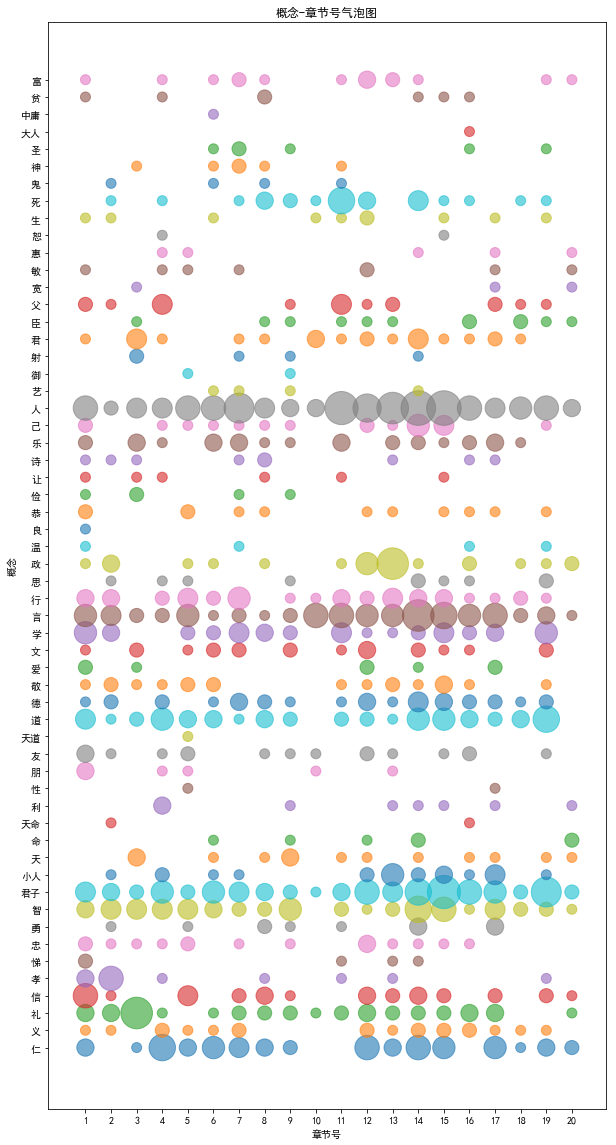

In [58]:
#绘制概念-章节气泡图
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['font.sans-serif'] = ['SimHei']

chapter = np.arange(1, 21, 1)
appear = {}
for i in range(0, 57):
    appear[i] = []
for i in range(0, 57):
    for c in chapter:
        appear[i].append(content2concept[c][i])
    for j in range(len(appear[i])):
        #原数据*100，方便画图
        appear[i][j] *= 100
#print(appear)

y = {}
for i in range(0, 57):
    y[i] = [i + 1] * 20

ylabels = []
for i in range(1, 58):
    ylabels.append(index2concept[i][0])
figure, ax = plt.subplots(figsize= (10, 20))
ax.set_yticks(np.arange(1, 58, 1))
ax.set_xticks(np.arange(1, 21, 1))
ax.set_xlabel('章节号')
ax.set_ylabel('概念')
ax.set_title('概念-章节号气泡图')
ax.set_yticklabels(ylabels)

for i in range(0, 57):
    plt.scatter(chapter, y[i], s = appear[i] * 1000, alpha = 0.6)

#plt.savefig('concept_chapter_bubble.png')
plt.show()


In [64]:
#每章节的概念向量计算相似度，寻找对应相似度最大的章节
def cos_simi(a, b):
    muti_sum = 0
    a_lensqur = 0
    b_lensqur = 0
    for i in range(len(a)):
        muti_sum += a[i] * b[i]
        a_lensqur += a[i]**2
        b_lensqur += b[i]**2
    base = a_lensqur**0.5 * b_lensqur**0.5
    return(muti_sum/ base)

#获得章节-章节相似度矩阵，交叉点为相似度
chapter2simi = {}
for i in range(0, 20):
    chapter2simi[i] = [0]*20
#print(chapter2simi)
for i in range(0, 20):
    for j in range(i + 1, 20):
        chapter2simi[i][j] = cos_simi(content2concept[i+1], content2concept[j+1])
        chapter2simi[j][i] = cos_simi(content2concept[i+1], content2concept[j+1])
#print(chapter2simi)


maxsimi_re = []
for i in range(0, 20):
    maxsimi_re.append(chapter2simi[i].index(max(chapter2simi[i])) + 1)
print(maxsimi_re)


#获得相似度最大匹配章节对
maxsimi = [0] * 20
whole = []
for i in range(0, 20):
    whole.extend(chapter2simi[i])
#print(whole)
for i in range(0, 10):
    ind = whole.index(max(whole))
    chapter_a = ind// 20
    chapter_b = ind% 20
    #print(chapter_a, chapter_b)
    maxsimi[chapter_a] = chapter_b + 1
    maxsimi[chapter_b] = chapter_a + 1
    for j in range(chapter_a * 20, (chapter_a + 1) * 20):
        whole[j] = 0
    for j in range(chapter_b * 20, (chapter_b + 1) * 20):
        whole[j] = 0
    for j in range(0, 20):
        whole[chapter_a + 20 * j] = 0
        whole[chapter_b + 20 * j] = 0
#print(maxsimi)

[5, 1, 9, 15, 1, 15, 6, 1, 14, 14, 18, 14, 12, 15, 14, 15, 14, 14, 15, 12]


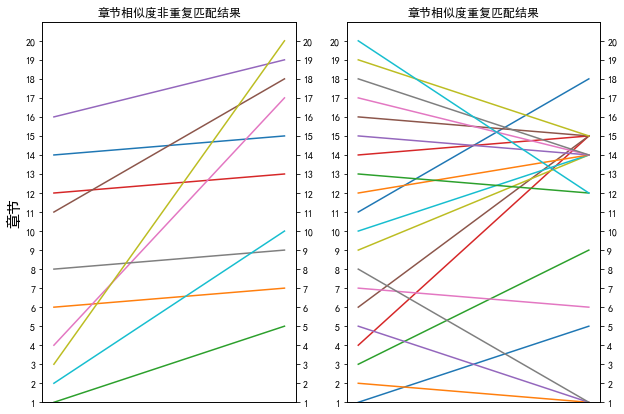

In [77]:
#绘制章节相似度匹配连线图
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(figsize=(10, 7))

#非重复匹配图
ax1 = fig.add_subplot(121)
x = np.arange(1, 3, 1)
y = {}
y = {1: [14,15], 2: [6,7], 3: [1,5], 4: [12,13], 5: [16,19], 6:[11,18],
    7:[4,17], 8:[8,9], 9:[3,20], 10:[2,10]}

ax1.set_ylim([1, 21])
ax1.set_yticks(np.arange(1, 21, 1))
ax1.set_xticks([])
ax1.set_ylabel('章节', fontsize=15)
ax1.set_title('章节相似度非重复匹配结果')
for i in range(1, 11):
    ax1.plot(x, y[i])

ax2 = ax1.twinx()
ax2.set_ylim([1, 21])
ax2.set_yticks(np.arange(1, 21, 1))

#重复匹配图
ax3 = fig.add_subplot(122)
x = np.arange(1, 3, 1)
y = {}
for i in range(20):
    y[i] = [i+1, maxsimi_re[i]]


ax3.set_ylim([1, 21])
ax3.set_yticks(np.arange(1, 21, 1))
ax3.set_xticks([])
ax3.set_title('章节相似度重复匹配结果')
for i in range(20):
    ax3.plot(x, y[i])

ax4 = ax3.twinx()
ax4.set_ylim([1, 21])
ax4.set_yticks(np.arange(1, 21, 1))

plt.savefig('chapter_similarity.png')
plt.show()